<a href="https://colab.research.google.com/github/guimaraess2/Multiple-Linear-Regression/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
! pwd

/content/sample_data


In [108]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


**Importando as bibliotecas / Importing the libraries**

In [0]:
#%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error


**Importando o dataset / Importing the dataset**

In [0]:
df=pd.read_csv('50_Startups.csv')

**Visualizando as primeiras 6 linhas do dataset / Viewing the first 6 lines of the dataset**

In [111]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Verificando se há valores nulos / Checking for null values**

In [112]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Valores estatísticos / Statistical values**

In [113]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**Visualização da correlação entre as variáveis através de mapa de calor / Correlation visualization through heat map**

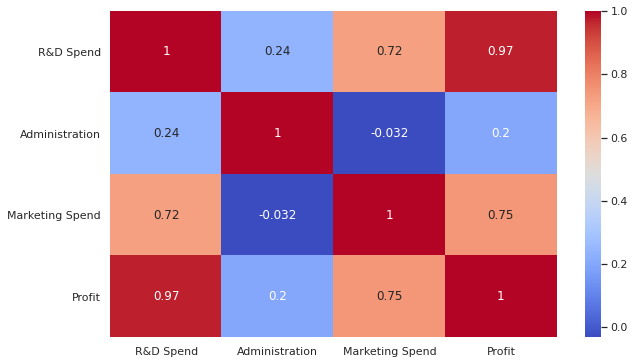

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws={'size':12} )
annot_kws={'fontsize':10, 'fontstyle':'italic',              
           'verticalalignment':'center'}
         
 


**Visualização do lucro por estados / Visualization of profit by states**

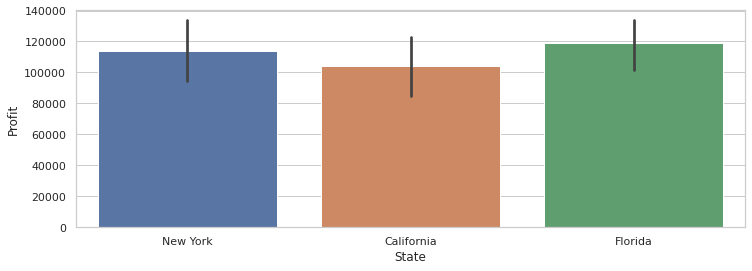

In [115]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.barplot( x="State", y="Profit", data=df)


**Visualização do lucro pelos quartis / Visualization of profit by quartiles**

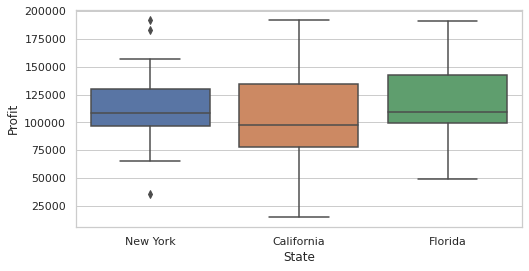

In [116]:
ax = sns.boxplot(x="State", y="Profit", data=df )

**Lucro obtido por gasto em pesquisa e desenvolvimento / Profit obtained by spending on research and developmen**

In [117]:

px.scatter(df, x='Profit', y='R&D Spend', color='State', width=1200, height=500)


**Visualização de gastos por estado / View spending by state**

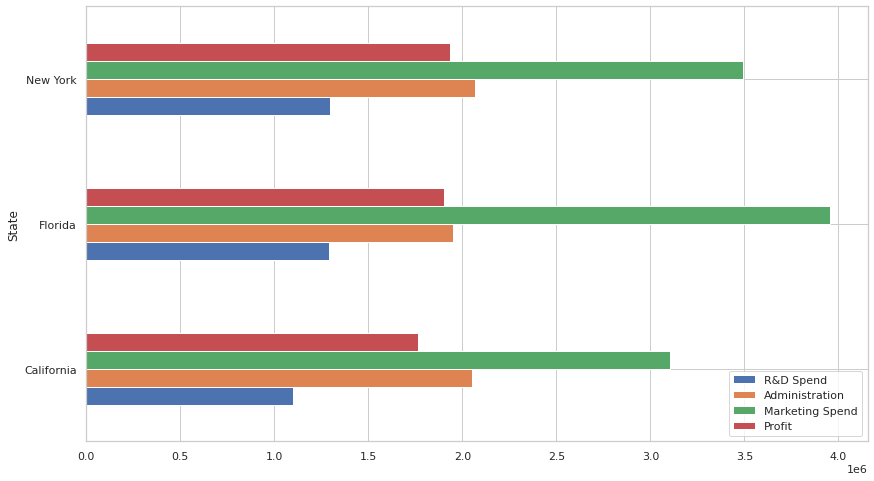

In [118]:
plt.rcParams['figure.figsize'] = (14, 8)
df.groupby('State').sum().plot.barh()

**Separando as varáveis dependentes e independentes / Separating dependent and independent variables**

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Codificando as  variáveis categoricas / Encoding categorical data**

In [0]:
col_tranf = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(col_tranf.fit_transform(X))

**Separando as variáveis de treino e de teste / Splitting the dataset into the Training set and Test set**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [122]:
print('Linhas e colunas de X_train = {}'.format(X_train.shape) )
print('Linhas e colunas de y_train = {}'.format(y_train.shape) )
print('Linhas e colunas de X_test = {}'.format(X_test.shape) )
print('Linhas e colunas de y_test = {}'.format(y_test.shape) )

Linhas e colunas de X_train = (40, 6)
Linhas e colunas de y_train = (40,)
Linhas e colunas de X_test = (10, 6)
Linhas e colunas de y_test = (10,)


**Treinando o modelo de regressão linear múltipla / Training the Multiple Linear Regression model on the Training set**

In [123]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prevendo os resultados do conjunto de testes / Predicting the Test set results**

In [0]:
y_pred = regressor.predict(X_test)


**Calculo do erro abosluto / Calculation of absolute error**

In [125]:
mae=mean_absolute_error(y_test, y_pred)
mae


7514.2936596433165

**Visualização do score / Score display**

In [126]:
score=regressor.score(X_test, y_test)
print('O score da base de teste é de: {:.2f}'.format(score*100),'%')

O score da base de teste é de: 93.47 %


**Visualização do lucro real e do lucro que o modelo fez a previsão /Visualization of the real profit and the profit that the model made the forecast** 

In [127]:
df1 = pd.DataFrame (y_pred, columns = ['Lucro_previsto'])
df1['Lucro_real'] = y_test
df1

,Lucro_previsto,Lucro_real
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
5,116161.242302,105008.31
6,67851.692097,81229.06
7,98791.733747,97483.56
8,113969.435330,110352.25
9,167921.065696,166187.94


In [131]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1.Lucro_previsto, mode='lines+markers', name='Lucro Previsto'))
fig.add_trace(go.Scatter(x=df1.index, y=df1.Lucro_real, mode='lines+markers', name='Lucro Real'))
fig.update_layout(autosize=False, width=800, height=500)
fig.show()